#  Dados Textuais: classificação e exploração.

In [1]:
!pip install Unidecode
import zipfile
from google.colab import drive

drive.mount('/content/drive', force_remount = True)
PATH = '/content/drive/MyDrive/Curso/Alura/nlp-intro-analise-sentimento'

zip_ref = zipfile.ZipFile(f"{PATH}/archive.zip", 'r')
zip_ref.extractall("/content/dados/")
zip_ref.close()

     |████████████████████████████████| 235 kB 6.8 MB/s 
Mounted at /content/drive


In [2]:
import pandas as pd

resenha = pd.read_csv("dados/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [4]:
from sklearn.linear_model import LogisticRegression

# Erro nao separamos os textos antes

regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia) 

In [5]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [6]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [7]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [8]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [9]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [10]:
resenha["classificacao"] = classificacao

In [11]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [12]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


# Bag of Words: criando representações da linguagem humana.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [14]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [15]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [16]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [17]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [18]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [19]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


# Visualizando os dados com WordCloud.

In [20]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todas_palavras)


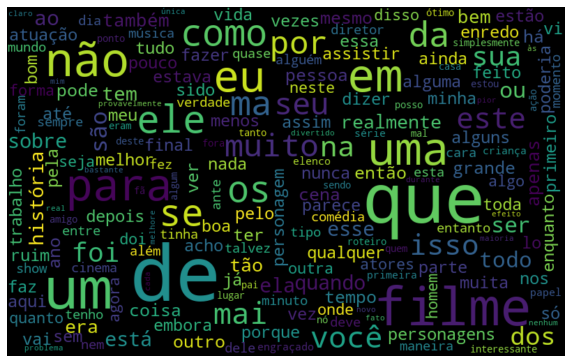

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [23]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

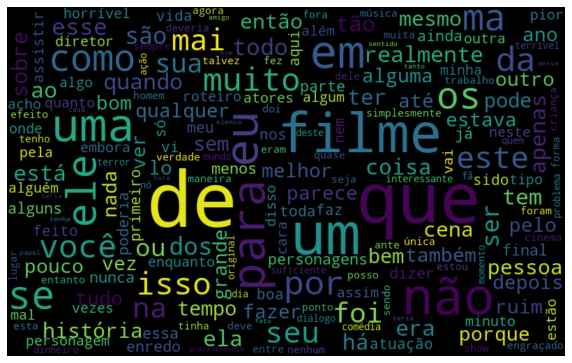

In [24]:
nuvem_palavras_neg(resenha, "text_pt")

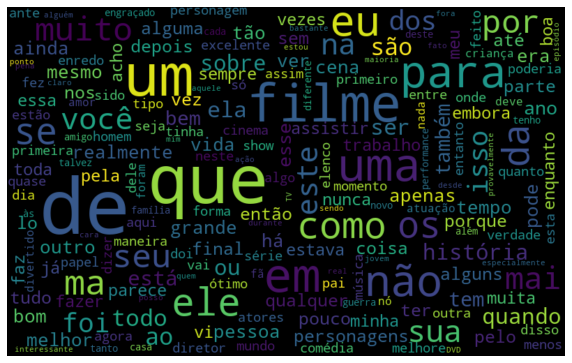

In [25]:
nuvem_palavras_pos(resenha, "text_pt")

# Tokenização e a bliblioteca NLTK.

In [26]:
import nltk 
nltk.download('stopwords')

frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [27]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [28]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [29]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# Uma nova visualização e os stop words.

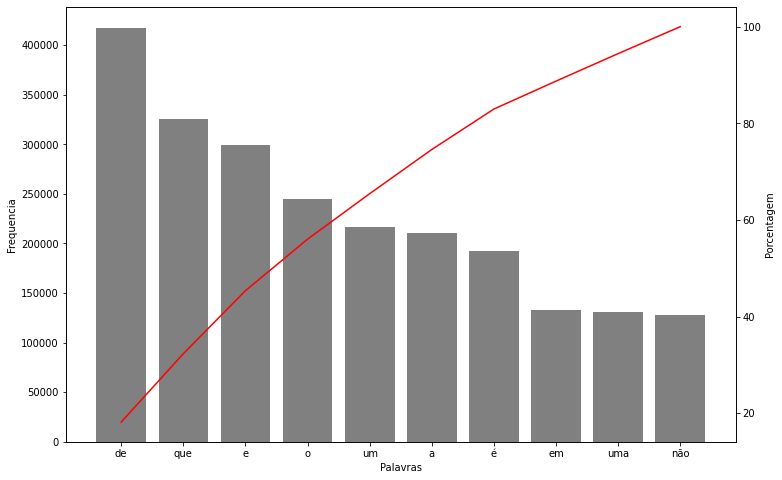

In [30]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencias = nltk.FreqDist(token_frase)
  df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
  df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

  total = df_frequencias['Frequencia'].sum()
  df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
  ax2 = ax.twinx()
  sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
  plt.show()



pareto(resenha, "text_pt", 10)


In [31]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada

In [32]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [33]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6607359482410028

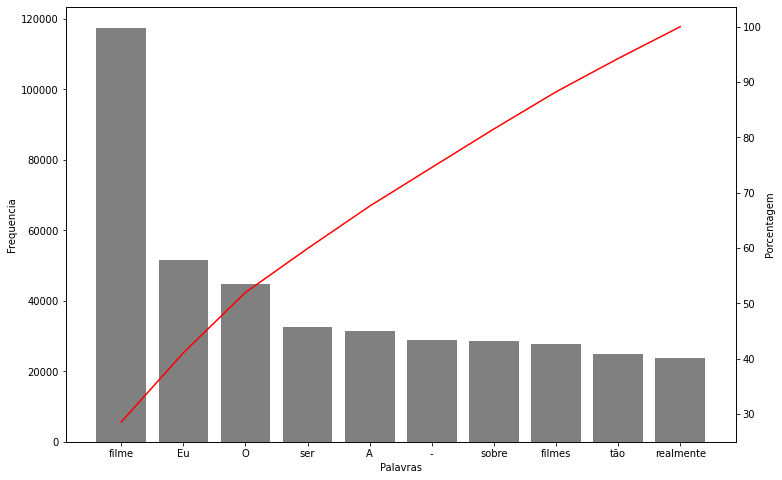

In [34]:
pareto(resenha,"tratamento_1", 10)

# Otimizando a análise: o primeiro passo 

In [35]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


# Melhorando a visualização do pareto

In [36]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [37]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [38]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [39]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

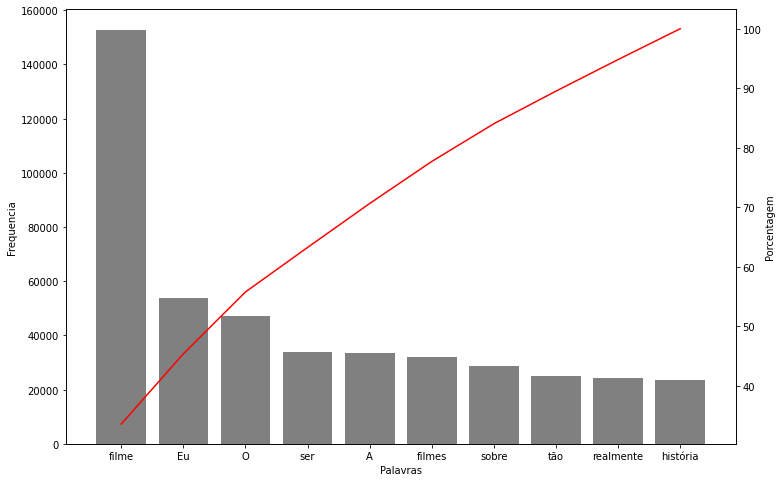

In [40]:
pareto(resenha, "tratamento_2", 10)

# Normalização de textos 

In [41]:

import unidecode


acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [42]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [43]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [44]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [45]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [46]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_3"] = frase_processada

In [47]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [48]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6810351799433886


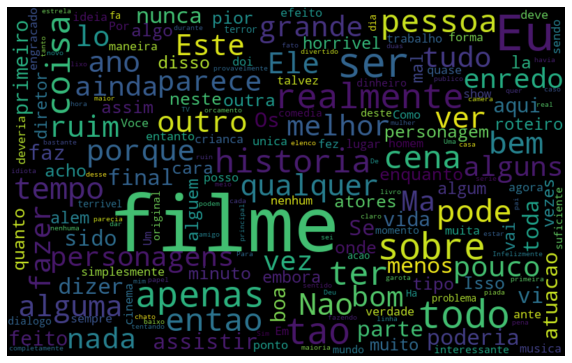

In [49]:
nuvem_palavras_neg(resenha, "tratamento_3")

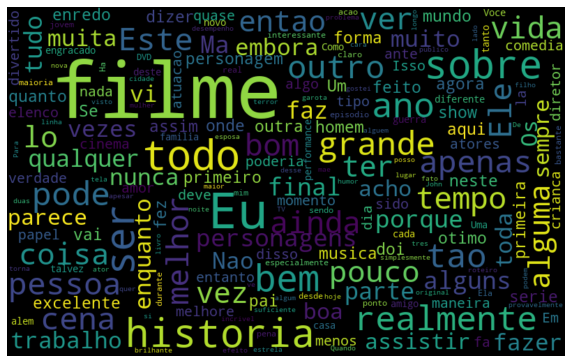

In [50]:
nuvem_palavras_pos(resenha, "tratamento_3")

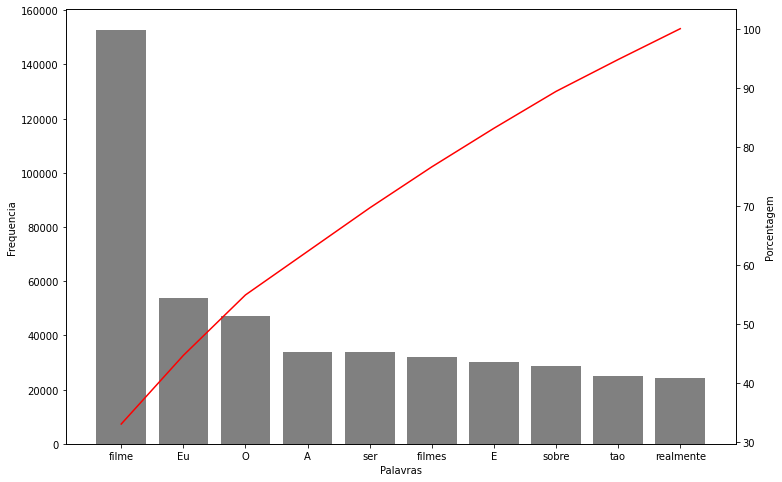

In [51]:
pareto(resenha, "tratamento_3", 10)

In [52]:
frase = "O Thiago é o novo instrutor da Alura"
print(frase.lower())

o thiago é o novo instrutor da alura


In [53]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

In [54]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [55]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [56]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6879094217549535
0.6810351799433886


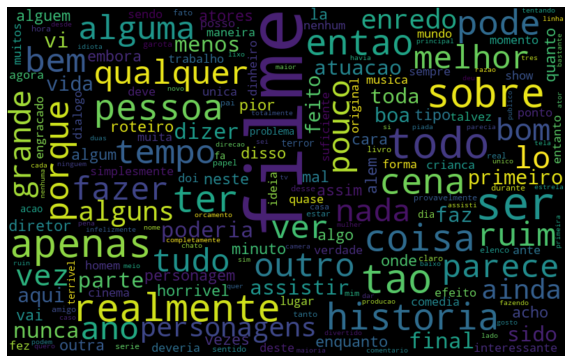

In [57]:
nuvem_palavras_neg(resenha, "tratamento_4")

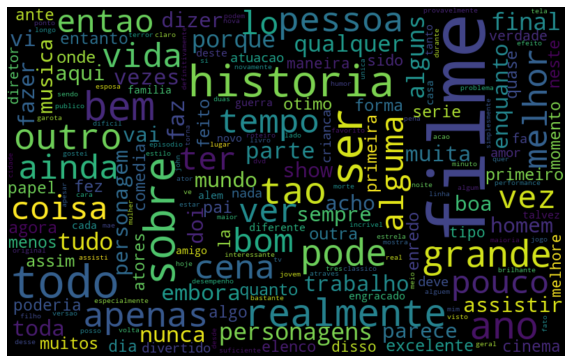

In [58]:
nuvem_palavras_pos(resenha, "tratamento_4")

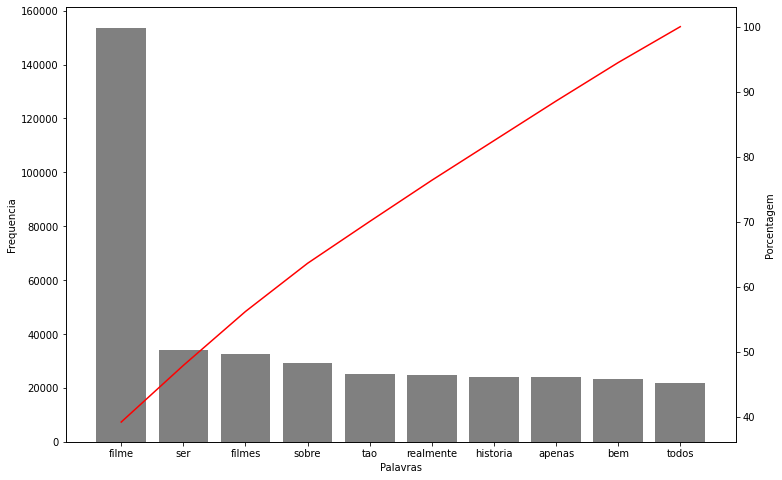

In [59]:
pareto(resenha, "tratamento_4", 10)

# Evitando flexões e derivações nas palavras

In [60]:
nltk.download('rslp')

stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


'corr'

In [61]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_5"] = frase_processada

In [62]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6943792964011323
0.6879094217549535


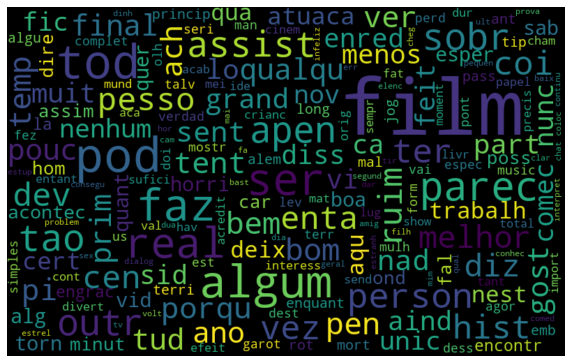

In [63]:
nuvem_palavras_neg(resenha, "tratamento_5")

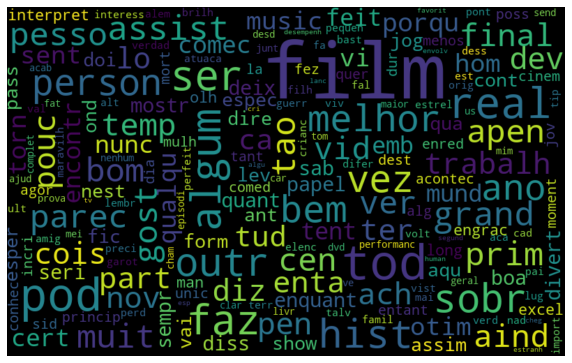

In [64]:
nuvem_palavras_pos(resenha,"tratamento_5")

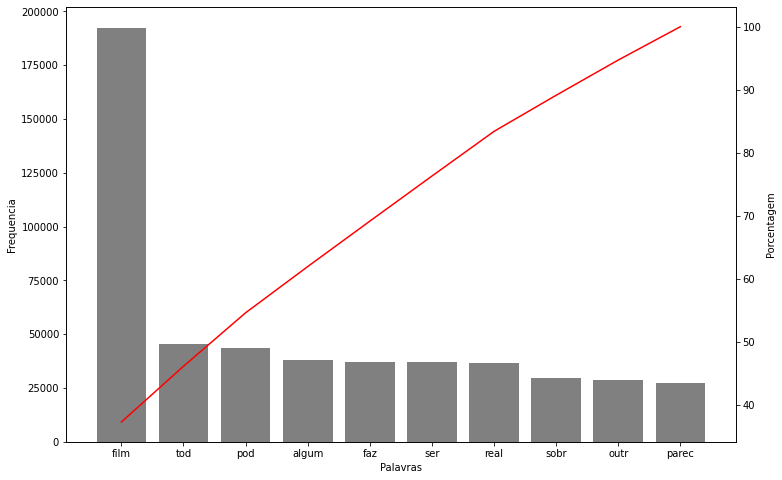

In [65]:
pareto(resenha, "tratamento_5", 10)

# TF-IDF e Ngrams: técnicas mais avançadas

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assiti um filme ótimo", "Assiti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

,Assiti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [76]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [77]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6988273352203801


In [78]:
print(acuracia_tratamento5)

0.6943792964011323


In [79]:
from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [80]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [81]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8841892438334007


In [82]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

pesos.nlargest(50,0)

,0
otim,8.290477
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579574
ador,4.422221
brilh,4.268573


In [83]:
pesos.nsmallest(10,0)

,0
pi,-9.175704
ruim,-9.169727
horri,-8.751674
terri,-7.186909
chat,-6.919291
nad,-6.029855
infeliz,-5.310519
decepca,-4.995830
ridicul,-4.950824
nenhum,-4.918832
